# **Proyecto Bootcamp Data Science Titanic Dataset**

# Descripción del Proyecto de Data Science

## 1.1 Resumen
Este proyecto tiene como objetivo predecir la variable objetivo `Survived`, que indica si un pasajero sobrevivió (`1`) o no sobrevivió (`0`). A continuación, se describen las características principales del conjunto de datos:

- **`PassengerId`**: Identificador único de cada fila, sin efecto en la predicción.
- **`Survived`**: Variable objetivo.  
  - **1**: Sobrevivió.  
  - **0**: No sobrevivió.  
- **`Pclass` (Clase del Pasajero)**: Representa el estatus socioeconómico, una variable categórica ordinal con tres valores únicos:  
  - **1**: Clase alta.  
  - **2**: Clase media.  
  - **3**: Clase baja.  
- **`Name`**, **`Sex`** y **`Age`**: Información descriptiva del pasajero.
- **`SibSp`**: Número total de hermanos y/o cónyuge del pasajero a bordo.
- **`Parch`**: Número total de padres y/o hijos del pasajero a bordo.
- **`Ticket`**: Número del boleto del pasajero.
- **`Fare`**: Costo del boleto del pasajero.
- **`Cabin`**: Número de cabina asignado al pasajero.
- **`Embarked`**: Puerto de embarque, una variable categórica con tres valores únicos:  
  - **C**: Cherbourg.  
  - **Q**: Queenstown.  
  - **S**: Southampton.

Este análisis se centra en explorar estas características para construir un modelo predictivo que permita clasificar correctamente la supervivencia de los pasajeros.

# **1.** Carga de las bibliotecas a utilizar para tratar nuestros datos.

In [21]:
import matplotlib.pyplot as plt  #Importamos la biblioteca Maplotlib, específicamente Pyplot para nuestras visualizaciones.
import numpy as np  #Numpy para el manejo de datos.
import pandas as pd #Pandas para el manejo de datos.
import seaborn as sns  #Seaborn para visualización de datos.
!pip install factor-analyzer   #Instalamos los complementos a utilizar más adelante mediante PIP (pip instals package)

In [38]:
#Importamos el dataset que vamos a utilizar
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#aplicamos la función head para revisar que todo esté en orden.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2.** Establecemos las métricas para definir el baseline de nuestro trabajo utilizando

In [39]:
#Vamos a utilizar 3 modelos de clasificación de machine learning: KNN, Random Forest y Regresión Logística.

# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Separar características y variable objetivo (target)
X = titanic.drop(['Survived'], axis=1)  # 'Survived' es la variable objetivo
y = titanic['Survived']

# Identificar columnas categóricas y numéricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Crear un pipeline para el preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores numéricos con la media
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores categóricos con el más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías con OneHotEncoder, usando un ignore en caso de datos desconocidos.
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modelo 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Modelo 3: Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))

# Evaluación adicional: Reporte de clasificación
print("\nKNN Classification Report:\n", classification_report(y_test, knn_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_preds))

KNN Accuracy: 0.7985074626865671
Random Forest Accuracy: 0.8097014925373134
Logistic Regression Accuracy: 0.8208955223880597

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.67      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.67      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157

In [40]:
titanic.info() #Usamos la función "info" para obtener un resumen de nuestros datos, el tipo y cantidad de "missing values".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tenemos principalmente 3 categorías con datos faltantes:
- 'Age'
- 'Cabin'
- 'Embarked'

Utilizaremos algunos acercamientos que detallamos en los siguientes pasos.



# **3.** Feature Engineering

Aquí realizamos 3 procesos a nuestros datos, todos basándonos en resultados y estudio de nuestro dataset:

1. Extracción de los títulos en los nombres. Esta es una información que impacta porque se asocia el título a la clase social y esta a su vez nos va a servir para obtener las edades faltantes y es un buen predictor de la supervivencia de una persona dentro del Titanic.
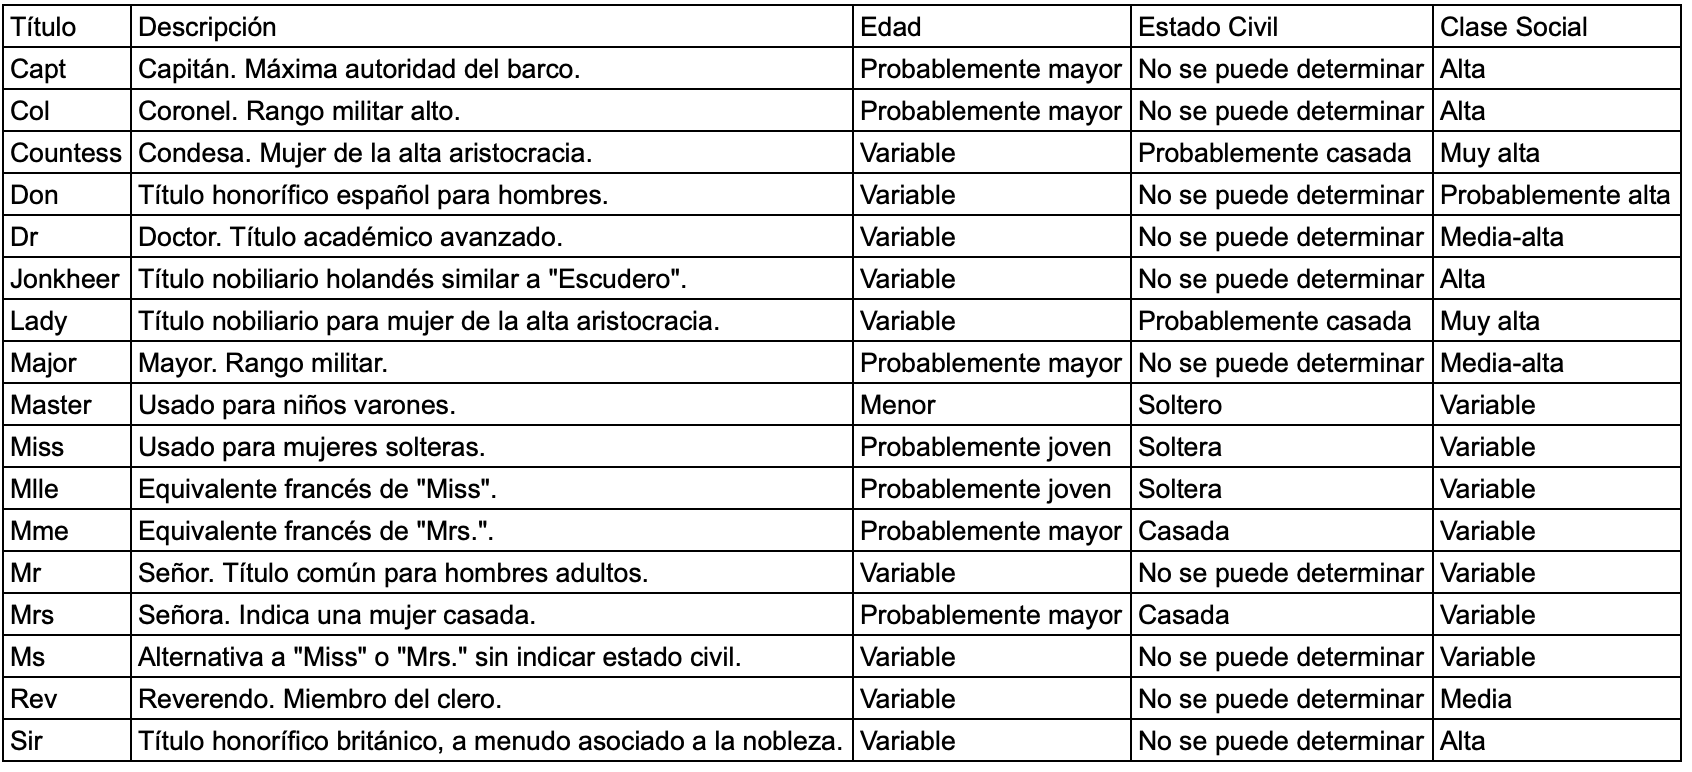



### 3.1 Extraemos el título del nombre

In [41]:
# Función para extraer el título del nombre
def extraer_titulo(nombre):
  import re
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)
  if titulo_busqueda:
    return titulo_busqueda.group(1)
  return ""

# Aplicar la función a la columna "Name" para crear la nueva columna "Title"
titanic['Title'] = titanic['Name'].apply(extraer_titulo)

# Mostrar las primeras filas del DataFrame con la nueva columna "Title"
print(titanic[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_19409/1173507618.py:4: SyntaxWarning: invalid escape sequence '\.'
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)


In [42]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Define las variables predictoras
features = ['Pclass', 'Title', 'Sex']

# Crea X e y para las filas con edad conocida
X = titanic[titanic['Age'].notnull()][features]
y = titanic[titanic['Age'].notnull()]['Age']

# Codifica las variables categóricas
ohe = OneHotEncoder(handle_unknown='ignore')
X_encoded = ohe.fit_transform(X)

# Ajusta el modelo de regresión lineal
model = LinearRegression()
model.fit(X_encoded, y)

# Crea X_missing_age para las filas con edad nula
X_missing_age = titanic[titanic['Age'].isnull()][features]

# Codifica X_missing_age
X_missing_age_encoded = ohe.transform(X_missing_age)

# Predice los valores de edad faltantes
predicted_ages = model.predict(X_missing_age_encoded)

# Imputa los valores predichos
titanic.loc[titanic['Age'].isnull(), 'Age'] = predicted_ages

# Muestra las primeras 5 filas del conjunto de datos con la columna 'Age' imputada
print(titanic.head().to_markdown(index=False, numalign="left", stralign="left"))

| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   | Title   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|:--------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          | Mr      |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          | Mrs     |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | S          | Miss    |
| 4             | 1      


### 3.2 Extracción 'Compartments'

Extraemos las letras de los compartimientos del titanic y revisamos cuál es la tasa de supervivencia por compartimiento.

In [43]:
# Extraer las letras de la columna 'Cabin' utilizando una expresión regular
titanic['Compartments'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Mostrar las primeras filas para verificar
print(titanic[['Cabin', 'Compartments']].head())

# Botamos la columna 'Cabin', dado que no la usaremos.
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Compartments
0   NaN          NaN
1   C85            C
2   NaN          NaN
3  C123            C
4   NaN          NaN


In [44]:
# Separamos y creamos columnas más pequeñas de los datos obtenidos de las 'Cabin Letters' en 5 grupos, el grupo 'M' es el más grande y es el que corresponde a 3a clase.

titanic['Compartments'] = titanic['Compartments'].replace(['A', 'B', 'C'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].replace(['D', 'E'], 'DE')
titanic['Compartments'] = titanic['Compartments'].replace(['F', 'G'], 'FG')
titanic['Compartments'] = titanic['Compartments'].replace(['T'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].fillna('M')

titanic['Compartments'].value_counts().sum()

891

Graficamos nuestras columnas usando un histograma para revisar la distribución de las clases para la columna 'Compartments'

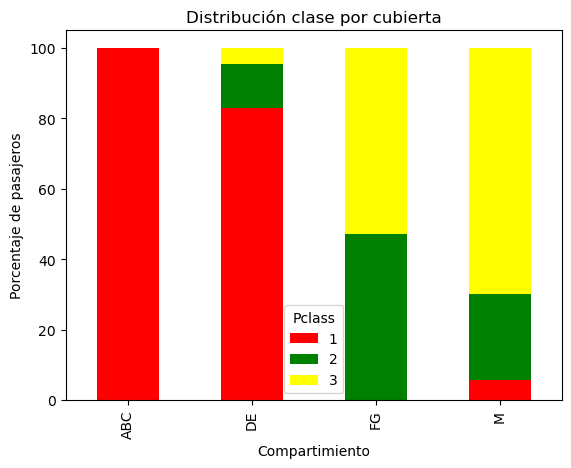

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento (Pclass)
data = titanic.groupby(['Compartments', 'Pclass']).size().unstack(fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100



# Crear el gráfico de barras apiladas con porcentaje
data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'yellow'])

# Etiquetas y título
plt.xlabel('Compartimiento')
plt.ylabel('Porcentaje de pasajeros')
plt.title('Distribución clase por cubierta')

# Mostrar el gráfico
plt.show()

Cómo vemos, la cubierta "M"(usamos esa letra para describir "missing" o faltante en inglés) tiene gran representación en tercera clase, y es la clase que tuvo más muertos.

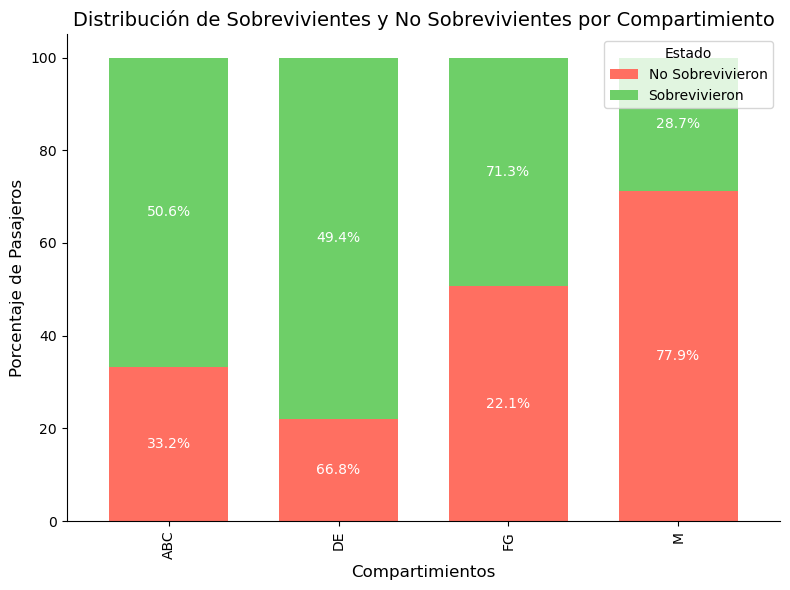

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento
data = titanic.pivot_table(index='Compartments', columns='Survived', values='PassengerId', aggfunc='sum', fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Renombrar columnas para mayor claridad
data_percentage.columns = ['No Sobrevivieron', 'Sobrevivieron']

# Crear el gráfico de barras apiladas con Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
data_percentage.plot(kind='bar', stacked=True, color=['#FF6F61', '#6ECF68'], width=0.7, ax=ax)

# Agregar etiquetas de porcentaje dentro de cada barra
for i, rect in enumerate(ax.patches):
    # Cada barra tiene un índice único, usamos su posición para encontrar el porcentaje correspondiente
    compartment_idx = i // 2  # Dos barras por compartimiento
    survived_idx = i % 2      # 0 = No sobrevivió, 1 = Sobrevivió
    value = data_percentage.iloc[compartment_idx, survived_idx]

    # Posición para la etiqueta (ajustamos para centrar)
    x_pos = rect.get_x() + rect.get_width() / 2
    y_pos = rect.get_y() + rect.get_height() / 2

    # Agregar el texto del porcentaje
    ax.text(x_pos, y_pos, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Personalización del gráfico
ax.set_xlabel('Compartimientos', fontsize=12)
ax.set_ylabel('Porcentaje de Pasajeros', fontsize=12)
ax.set_title('Distribución de Sobrevivientes y No Sobrevivientes por Compartimiento', fontsize=14)
ax.legend(title='Estado', fontsize=10)
sns.despine()

# Ajustar espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

Con este ejemplo gráfico podemos observar que los pasajeros que se encontraban en las cabinas con mayor presencia de 1a clase fueron las que tuvieron menores muertes, lo que parece indicar que existe una relación entre el compartimiento y la supervivencia.

In [47]:
# De la información recopilada en Kaggle, entendemos que los datos faltantes de 'Embarked' corresponden a una pasajeros que eran del valor 'S'

titanic['Embarked'] = titanic['Embarked'].fillna('S')

### 3.3 Columna 'Family'

Genero una columna unificada 'Family' uniendo 'SibSp' (siblings y spouse) y 'Parch' (parents and children) más 1, de manera de obtener la familia completa de ese pasajero a bordo. Con esto, agregamos una columna que separe personas solas de personas con familia a bordo.

In [48]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Compartments'],
      dtype='object')

In [49]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic = titanic.drop(['SibSp', 'Parch'], axis=1)
titanic['IsAlone'] = (titanic['Family'] == 1).astype(int) #Generamos una selección creando una columna nueva.

In [13]:
# Separar características y variable objetivo (target)
X = titanic.drop(['Survived'], axis=1)  # 'Survived' es la variable objetivo
y = titanic['Survived']

# Identificar columnas categóricas y numéricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Crear un pipeline para el preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores numéricos con la media
    ('scaler', StandardScaler())  # Escalar los datos numéricos
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores categóricos con el más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías con OneHotEncoder, usando un ignore en caso de datos desconocidos.
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modelo 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Modelo 3: Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))

# Evaluación adicional: Reporte de clasificación
print("\nKNN Classification Report:\n", classification_report(y_test, knn_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_preds))

KNN Accuracy: 0.8208955223880597
Random Forest Accuracy: 0.8171641791044776
Logistic Regression Accuracy: 0.832089552238806

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       157


# 📊 Comparación de Modelos Antes y Después del Feature Engineering

## Resultados

| Modelo                 | Accuracy Antes | Accuracy Después | Cambio |
|------------------------|---------------|----------------|--------|
| **KNN**               | 0.7985        | 0.8209        | ⬆ +0.0224 |
| **Random Forest**     | 0.8097        | 0.8172        | ⬆ +0.0075 |
| **Logistic Regression** | 0.8209        | 0.8321        | ⬆ +0.0112 |

---

## Análisis

- **Todos los modelos mejoraron en precisión después del Feature Engineering.**
- **KNN mostró la mayor mejora** (+2.24%), lo que indica que las nuevas características ayudan a este modelo a identificar patrones de manera más eficiente.
- **Random Forest y Regresión Logística** también mejoraron, aunque en menor medida, lo que sugiere que los cambios fueron beneficiosos, pero no tan impactantes para estos modelos.
- En general, el Feature Engineering fue **efectivo** y mejoró el desempeño del modelo en la tarea de clasificación. 🚀



# **4.** Reducción de Dimensionalidad

## 4.1 Revisamos correlaciones entre variables.

Para iniciar nuestra reducción, realizamos un análisis de correlación entre las variables para definir si corresponde aplicar y cuáles serán modificadas. El objetivo es capturar la mayor cantidad de datos sin perder información, para esto realizamos un heatmap pues resulta más fácil de analizar.

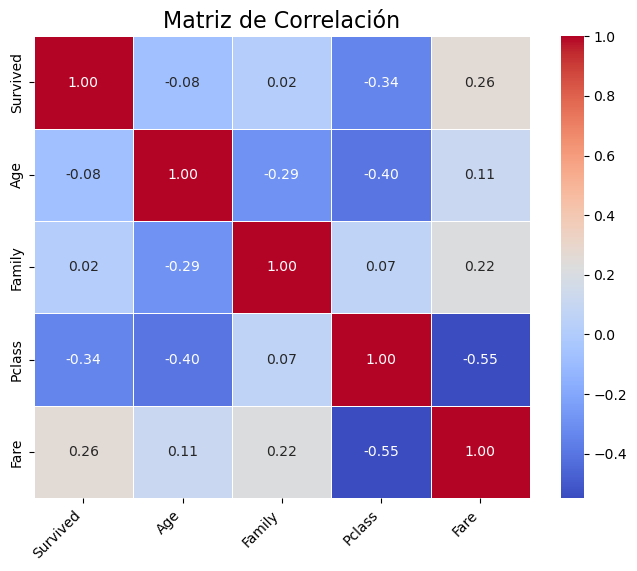

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas específicas
columns_of_interest = ['Survived', 'Age', 'Family', 'Pclass', 'Fare']
df_selected = titanic[columns_of_interest]

# Aumentar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el heatmap de correlación
sns.heatmap(
    df_selected.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Rotar las etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Agregar un título al heatmap
plt.title("Matriz de Correlación", fontsize=16)

# Mostrar el gráfico
plt.show()


Las variables analizadas parecen distribuirse en dos categorías que tienen relación con el parentesco y con la clase social. Es importante considerar que unificamos 'Parch' y 'SibSp' en una misma categoría 'Family', por lo que solamente nos quedaría reducir las variables que tienen relación con la clase social.

- 'Age' tiene una correlación moderada con 'Pclass'

- 'Pclass' tiene una alta correlación con 'Fare' y luego una  correlación moderada con 'Age'.  

- 'Fare' tiene una alta correlación con 'Pclass'.

En conclusión, las correlaciones entre las dos últimas categorías revisadas pueden sugerir una posible colinealidad que empeora el resultado de nuestro modelo. Por esto vamos a probar con el método PCA y crearemos una nueva categoría 'Estatus_Socioeconomico_PCA'. Vamos a correr nuestras pruebas y revisar el rendimiento de nuestro modelo.


In [55]:
# Ejemplo 2:  Usando PCA (1 componente principal)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic[['Pclass', 'Fare']])

pca = PCA(n_components=1)
titanic['Estatus_Socioeconomico_PCA'] = pca.fit_transform(titanic_scaled)

Varianza explicada por cada componente:
Componente 1: 0.4357
Componente 2: 0.3259
Componente 3: 0.1487
Componente 4: 0.0896

Varianza explicada acumulada:
Hasta el componente 1: 0.4357
Hasta el componente 2: 0.7616
Hasta el componente 3: 0.9104
Hasta el componente 4: 1.0000


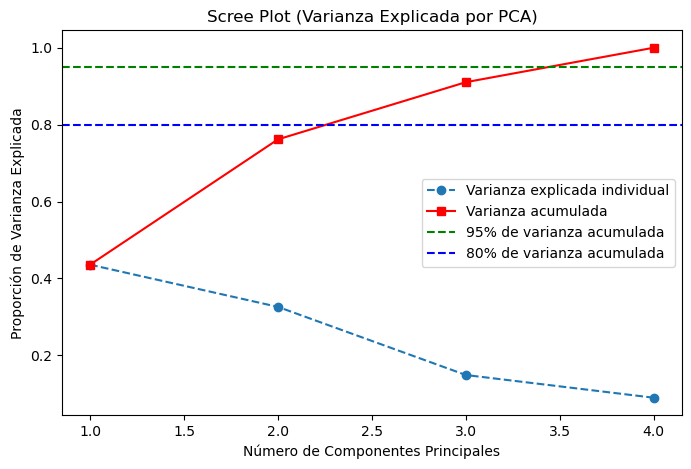

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas
variables = ['Age', 'Family', 'Pclass', 'Fare']
titanic_selected = titanic[variables]

# Escalar las variables antes de aplicar PCA
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA sin limitar el número de componentes
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(explained_variance)

# Mostrar la varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.4f}")

print("\nVarianza explicada acumulada:")
for i, var in enumerate(varianza_acumulada):
    print(f"Hasta el componente {i+1}: {var:.4f}")

# 📊 Scree Plot (Gráfico de Codo)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', label="Varianza explicada individual")
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='s', linestyle='-', label="Varianza acumulada", color='r')
plt.axhline(y=0.95, color='g', linestyle='--', label="95% de varianza acumulada")
plt.axhline(y=0.8, color='b', linestyle='--', label="80% de varianza acumulada")

plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Scree Plot (Varianza Explicada por PCA)')
plt.legend()
plt.show()

A partir del resultado anterior, voy a realizar la extracción de una nueva variable denominada 'Estatus_Socioeconómico_PCA' que agrupe las variables Pclass y Fare. Procederemos a testear nuestros resultados con este cambio.

Componentes para ≥80% varianza: 3
Componentes para ≥95% varianza: 4


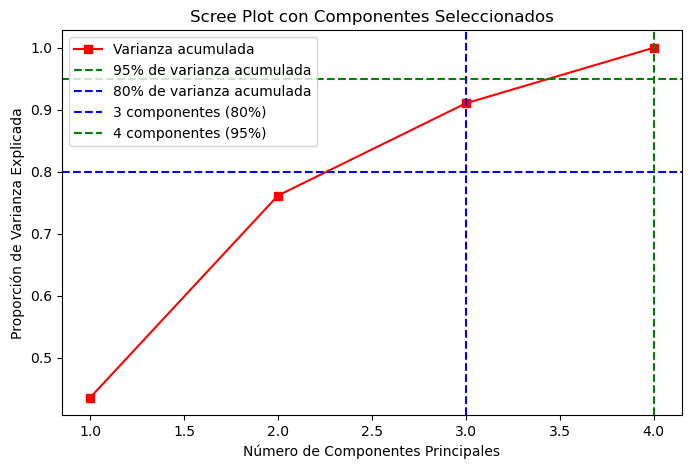

        PC1       PC2       PC3
0  1.107232  0.025876 -0.053663
1 -1.791692  0.196203 -0.025480
2  0.903885 -0.573326 -0.242648
3 -1.483123  0.130882 -0.065324
4  0.580525 -0.881771  0.218337


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas
variables = ['Age', 'Family', 'Pclass', 'Fare']
titanic_selected = titanic[variables]

# Escalar las variables antes de aplicar PCA
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA sin limitar componentes para analizar la varianza explicada
pca_full = PCA()
pca_full.fit(titanic_scaled)

# Obtener la varianza acumulada
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

# Determinar el número de componentes que explican al menos 80% y 95% de la varianza
num_components_80 = np.argmax(varianza_acumulada >= 0.80) + 1
num_components_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"Componentes para ≥80% varianza: {num_components_80}")
print(f"Componentes para ≥95% varianza: {num_components_95}")

# 📊 Visualizar la varianza acumulada con los puntos clave
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='s', linestyle='-', color='r', label="Varianza acumulada")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% de varianza acumulada")
plt.axhline(y=0.8, color='b', linestyle='--', label="80% de varianza acumulada")
plt.axvline(x=num_components_80, color='b', linestyle='--', label=f"{num_components_80} componentes (80%)")
plt.axvline(x=num_components_95, color='g', linestyle='--', label=f"{num_components_95} componentes (95%)")

plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Scree Plot con Componentes Seleccionados')
plt.legend()
plt.show()

# 🔹 Aplicar PCA con el número óptimo de componentes
pca_optimo = PCA(n_components=num_components_80)  # Puedes cambiar a num_components_95 si prefieres
titanic_pca = pca_optimo.fit_transform(titanic_scaled)

# Convertir los componentes principales en un DataFrame
titanic_pca_df = pd.DataFrame(titanic_pca, columns=[f'PC{i+1}' for i in range(num_components_80)])

# Agregar de vuelta la variable objetivo si es necesario
# titanic_pca_df['Survived'] = titanic['Survived']  # Descomentar si necesitas la etiqueta

print(titanic_pca_df.head())  # Muestra las primeras filas del DataFrame

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Suponemos que ya tienes los datos con PCA en 'titanic_pca_df'
# Agregamos la columna 'Survived' desde el dataset original
titanic_pca_df['Survived'] = titanic['Survived']  # Asegúrate de que la variable objetivo está incluida

# Definir variables de entrada (X) y salida (y)
X_pca = titanic_pca_df[['PC1', 'PC2', 'PC3']]  # Usamos los 3 primeros componentes principales
y = titanic_pca_df['Survived']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Definir modelos de Machine Learning
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Función para entrenar y evaluar modelos
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # Entrenar el modelo
        y_pred = model.predict(X_test)  # Hacer predicciones
        accuracy = accuracy_score(y_test, y_pred)  # Calcular precisión
        results[name] = accuracy  # Guardar resultados
        print(f"\n🔹 Modelo: {name}")
        print(classification_report(y_test, y_pred))
    return results

# Evaluar modelos con los datos transformados por PCA
print("\n📊 Resultados de Modelos entrenados con PCA:")
results_pca = evaluate_models(X_train, X_test, y_train, y_test)

# Mostrar los resultados en consola
print("\n📊 Comparación de Accuracy de Modelos PCA:")
print(pd.DataFrame.from_dict(results_pca, orient='index', columns=['Accuracy']))


📊 Resultados de Modelos entrenados con PCA:

🔹 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       157
           1       0.83      0.40      0.54       111

    accuracy                           0.72       268
   macro avg       0.76      0.67      0.67       268
weighted avg       0.75      0.72      0.69       268


🔹 Modelo: Decision Tree
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       157
           1       0.57      0.48      0.52       111

    accuracy                           0.63       268
   macro avg       0.62      0.61      0.61       268
weighted avg       0.63      0.63      0.63       268


🔹 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       157
           1       0.63      0.54      0.58       111

    accuracy                           0.68       268
  

## **4.2** Comparación de Resultados Antes y Después de PCA

## Resumen de la Comparación

| Modelo                | Accuracy Anterior | Accuracy Actual | Cambio |
|-----------------------|------------------|----------------|--------|
| **Logistic Regression** | **0.8209 - 0.8321** | **0.7164** | ⬇ **-10.4% a -11.6%** |
| **Decision Tree**      | **0.7985**        | **0.6343** | ⬇ **-16.4%** |
| **Random Forest**      | **0.8097 - 0.8172** | **0.6791** | ⬇ **-13.0% a -13.8%** |

---

## **Análisis de Resultados**
- **Todos los modelos disminuyeron su precisión después de PCA**, lo que sugiere una pérdida de información relevante.
- **Logistic Regression sigue siendo el mejor modelo**, pero su rendimiento cayó aproximadamente **10-11%**.
- **Decision Tree tuvo la mayor caída (-16.4%)**, lo que indica que dependía más de las variables originales.
- **Random Forest también sufrió una reducción significativa (-13%)**, lo que muestra que la transformación afectó su capacidad predictiva.

---

## **Posibles Razones de la Caída**
1. **Pérdida de información clave** en la reducción de dimensionalidad.
2. **Los modelos basados en árboles (Decision Tree, Random Forest)** pueden necesitar más variables originales para encontrar patrones efectivos.
3. **Los componentes principales pueden no representar bien la relación con la variable objetivo** (`Survived`).

---

**Conclusión:**  
El uso de PCA en este caso **no mejoró el rendimiento de los modelos, sino que lo redujo**. Continuaremos sin el PCA.

# **5.** Aplicamos manejo de Outliers

### **5.1** Visualización Outliers

Usamos boxplots para visualizar los valores atípicos y luego los removemos identificando el rango intercuartílico de los datos.

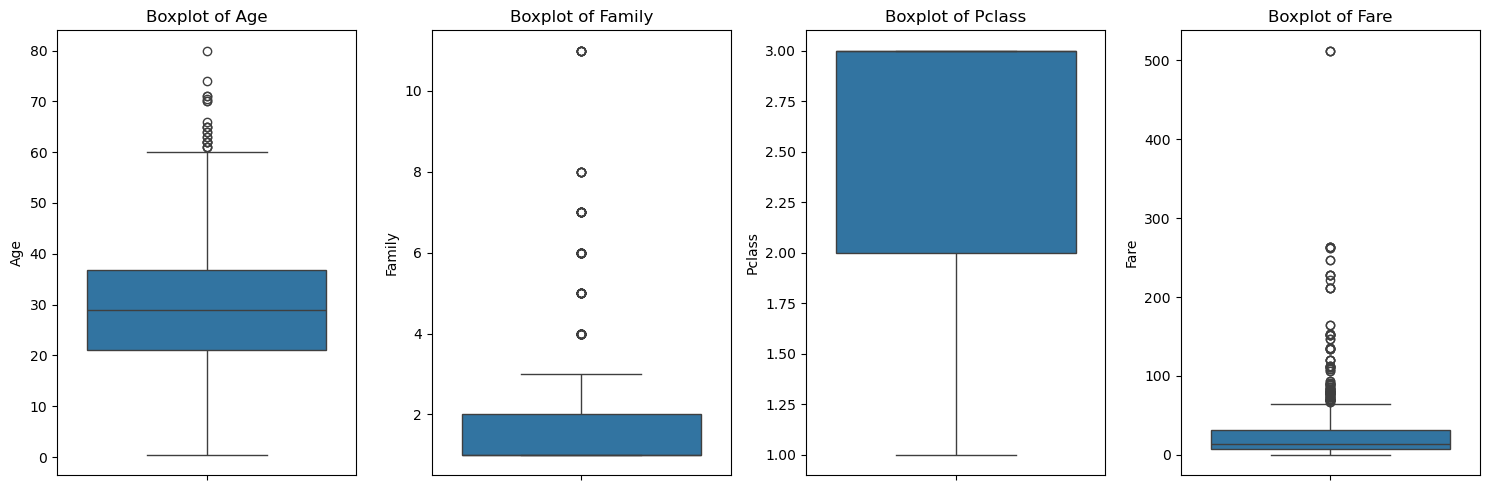

In [62]:

# Visualización con Boxplots

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Family', 'Pclass', 'Fare'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



In [63]:
#Eliminamos los valores atípicos presentes en las columnas 'Age', 'Fare' y 'Family'.

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removemos los valores de las columnas
df_no_outliers = remove_outliers_iqr(titanic, 'Age')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Family')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Pclass')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Fare')

# hacemos un print del nuevo dataset
print(df_no_outliers.head())

   Estatus_Socioeconomico_PCA        Age  Family  Pclass     Fare  Survived
0                    0.940326  22.000000       2       3   7.2500         0
2                    0.930716  26.000000       1       3   7.9250         1
3                   -1.404906  35.000000       2       1  53.1000         1
4                    0.928937  35.000000       1       3   8.0500         0
5                    0.923123  29.032899       1       3   8.4583         0


### **5.2** Isolation Forest

Utilizamos IsolationForest para realizar el manejo de outliers según lo revisado en clases.

In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crear una copia del dataset para análisis de outliers
titanic_test = titanic.copy()

# Seleccionar variables numéricas para Isolation Forest
df_num = titanic_test.select_dtypes(include=[np.number]).drop(columns=['Survived'])  # Excluye la variable objetivo

# Aplicar Isolation Forest para detectar outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
titanic_test['outlier'] = iso_forest.fit_predict(df_num)

# Crear datasets separados
with_outliers = titanic_test.drop(columns=['outlier'])  # Dataset original con outliers
without_outliers = titanic_test[titanic_test['outlier'] == 1].drop(columns=['outlier'])  # Sin outliers
only_outliers = titanic_test[titanic_test['outlier'] == -1].drop(columns=['outlier'])  # Solo outliers

# Función para entrenar y evaluar modelos
def train_and_evaluate(df, label="Con Outliers"):
    X = df.drop(columns=['Survived'])
    y = df['Survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalado de datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Modelos a entrenar
    models = {
        "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Regresión Logística": LogisticRegression(max_iter=200)
    }

    # Evaluación de modelos
    print(f"\nResultados para dataset: {label}")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {accuracy:.4f}")

# Comparar modelos con y sin outliers
train_and_evaluate(with_outliers, "Con Outliers")
train_and_evaluate(without_outliers, "Sin Outliers")
train_and_evaluate(only_outliers, "Solo Outliers")  # Opcional: evaluar solo los outliers


Resultados para dataset: Con Outliers
Random Forest: Accuracy = 0.7486
KNN: Accuracy = 0.7374
Regresión Logística: Accuracy = 0.7374

Resultados para dataset: Sin Outliers
Random Forest: Accuracy = 0.7516
KNN: Accuracy = 0.7143
Regresión Logística: Accuracy = 0.7019

Resultados para dataset: Solo Outliers
Random Forest: Accuracy = 0.8333
KNN: Accuracy = 0.5556
Regresión Logística: Accuracy = 0.5000


## **5.3** Conclusiones del Manejo de Outliers

En las pruebas vemos que los modelos sufren pérdida de desempeño sin los outliers, por lo que mantenemos los datos originales sin este tratamiento.

# **6.** Ajustes de Hiperparámetros.

Utilizamos método "GridSearch" revisado en clases

In [65]:
# Cargamos datos en variables X e y
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Dividir en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identificar columnas categóricas y numéricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [66]:
params_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [4, 5, 6, 7, 8],  # Profundidad máxima del árbol
    'min_child_weight': [1, 3, 5, 10],  # Peso mínimo en los nodos hoja
    'gamma': [0, 0.5, 1, 1.5, 2, 5],  # Reducción mínima de pérdida para hacer un split
    'subsample': [0.5, 0.6, 0.8, 1.0],  # Fracción de muestras usadas en cada árbol
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],  # Fracción de características usadas en cada árbol
    'colsample_bylevel': [0.5, 0.7, 1.0],  # Fracción de características en cada nivel del árbol
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  # Regularización L1 (Lasso)
    'reg_lambda': [0, 0.01, 0.1, 1, 10],  # Regularización L2 (Ridge)
    'objective': ['binary:logistic'],  # Función de pérdida para clasificación binaria
    'eval_metric': ['logloss', 'auc'],  # Métricas de evaluación
    'random_state': [42]  # Semilla para reproducibilidad
}

In [67]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Definir los grids de hiperparámetros
param_grids = {
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10]}
}

# Ejecutar GridSearchCV y evaluar cada modelo
best_models = {}
for name, model in models.items():
    print(f"Ejecutando GridSearchCV para {name}...")
    grid_cv = GridSearchCV(model, param_grids[name], scoring="accuracy", n_jobs=-1, cv=3, verbose=1)
    grid_cv.fit(X_train, y_train)

    best_models[name] = grid_cv.best_estimator_
    print(f"\n{name} Mejores Parámetros: {grid_cv.best_params_}")
    print(f"{name} Mejor CV Score: {grid_cv.best_score_}")
    print(f"{name} Accuracy en test: {round(accuracy_score(y_test, best_models[name].predict(X_test)), 5)}")
    print(f"\n{name} Classification Report:\n", classification_report(y_test, best_models[name].predict(X_test)))


Ejecutando GridSearchCV para KNN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

KNN Mejores Parámetros: {'n_neighbors': 9, 'weights': 'uniform'}
KNN Mejor CV Score: 0.7142868202650812
KNN Accuracy en test: 0.65672

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       165
           1       0.55      0.56      0.56       103

    accuracy                           0.66       268
   macro avg       0.64      0.64      0.64       268
weighted avg       0.66      0.66      0.66       268

Ejecutando GridSearchCV para Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Random Forest Mejores Parámetros: {'max_depth': 10, 'n_estimators': 100}
Random Forest Mejor CV Score: 0.7479871175523348
Random Forest Accuracy en test: 0.68284

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       